# Create 1ha plots from ODK points

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/vector-data-processing/reproject-vector-data-in-python/

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from fiona.crs import from_epsg
import earthpy as et


In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

ModuleNotFoundError: No module named 'earthpy'

In [2]:
cd C:/Users/rmcgr/Desktop/ODK_Outputs

C:\Users\rmcgr\Desktop\ODK_Outputs


In [2]:
dirname = 'C:/Users/rmcgr/Desktop/ODK_Outputs'
endfilename = '.shp'

In [3]:
# Setting plotting style for the notebook
sns.set_style("white")
sns.set(font_scale=1.5)

# Set working dir & get data
#data = et.data.get_data('spatial-vector-lidar')
#os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [4]:
data = gpd.read_file('C:/Users/rmcgr/Desktop/ODK_Outputs/ouput3/ODK_output.shp')

In [5]:
data.head()
print("Goordinate system: ", data.crs)

Goordinate system:  {'proj': 'longlat', 'ellps': 'GRS80', 'no_defs': True}


In [6]:
data.geometry.head()

0    POINT (134.64629 -24.00203)
1    POINT (134.81534 -24.06499)
2    POINT (134.83788 -24.16086)
3    POINT (134.70774 -24.08825)
4    POINT (134.76501 -23.85577)
Name: geometry, dtype: geometry

In [7]:
# Let's make a copy of our data
orig = data.copy()

# Reproject the data

geom = data.geometry.to_crs(crs=GRS80, epsg=32752)
data.geometry = geom
data.crs = geom.crs

# Check the new geometry values
print(data['geometry'].head())

NameError: name 'GRS80' is not defined

In [8]:
def epsg(epsg_code):
    
    """
    function to convert the epsg code to proj4, the orginal example of the code used pycrs 
    to obtain this infromatin for the internet. This version relies on it being in this function. 
    I have covered all the codes relevent to me however it may fail if used elsewhere.
    
    """
    if epsg_code == 32752:
        epsg_code_proj4 = '+proj=utm +zone=52 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs'
    if epsg_code == 32753:
        epsg_code_proj4 = '+proj=utm +zone=53 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs'
        
    if epsg_code == 28352:
        epsg_code_proj4 = '+proj=utm +zone=52 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs'   
    
    if epsg_code == 28353:
        epsg_code_proj4 = '+proj=utm +zone=53 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs'        
    
    if epsg_code == 4283:
        epsg_code_proj4 = '+proj=longlat +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +no_defs'     
        
    if epsg_code == 6644:
        epsg_code_proj4 = '+proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=134 +x_0=0 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs' 
    if epsg_code == 3577:
        epsg_code_proj4 = '+proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=132 +x_0=0 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs'
    
    return epsg_code_proj4

In [ ]:
def listdir(dirname,endfilename):
    """
    this function will return a list of files in a directory for the given file extention. 
    """
    list_img = []
    windows_path = []
       
    for root, dirs, files in os.walk(dirname):
        for file in files:
            if file.endswith(endfilename):
                img = (os.path.join(root, file))
                list_img.append(img)
                print (img)
                
    for i in list_img:
        odk = gpd.read_file(i)
        orig = odk.copy()
        #convert coordinate system to WGS84
        odk.crs =from_epsg(4326)
        odk_WGS84_z52 = odk.to_crs(epsg =32752)
        odk_WGS84_z53 = odk.to_crs(epsg =32753)
        print(odk_WGS84_z52)
    
    return list_img


listdir(dirname,endfilename)





In [ ]:
listdir(dirname,endfilename)

In [ ]:
for i in list_img:
    odk = gpd.read_file(i)

https://gis.stackexchange.com/questions/314949/creating-square-buffers-around-points-using-shapely

In [ ]:
%pip install descartes

In [10]:
%pip install descartes

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import descartes

<AxesSubplot:>

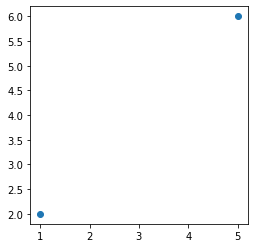

In [12]:
# Generate some sample data 
p1 = Point((1,2))
p2 = Point((5,6))
df = pd.DataFrame({'a': [11,22]})
gdf = gpd.GeoDataFrame(df, geometry = [p1,p2])
gdf.plot()

In [16]:
gdf

,a,geometry
0,11,POINT (1.00000 2.00000)
1,22,POINT (5.00000 6.00000)


C:\ProgramData\Anaconda3\envs\earth-analytics\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


<AxesSubplot:>

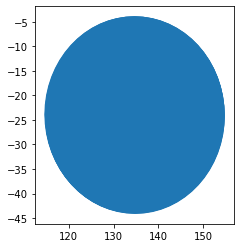

In [17]:
# Buffer the points by 200 units (WGS=m)
buffer = data.buffer(20)
buffer.plot()

<AxesSubplot:>

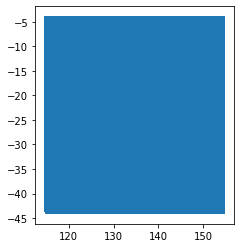

In [18]:
# Apply an envelope around circular buffers
envelope = buffer.envelope  
envelope.plot()

In [19]:
from __future__ import print_function
import ogr
import osr

In [20]:
datasource = open_shapefile('C:/Users/rmcgr/Desktop/ODK_Outputs/ouput3/ODK_output.shp')
print(datasource.geometry.crs)

NameError: name 'open_shapefile' is not defined

In [21]:
# Inspect the fields available in the layer.
feature_definition = layer.GetLayerDefn()
for field_index in range(feature_definition.GetFieldCount()):
    field_definition = feature_definition.GetFieldDefn(field_index)
    print("\t{}\t{}\t{}".format(field_index,
                                field_definition.GetTypeName(),
                                field_definition.GetName()))

NameError: name 'layer' is not defined

In [22]:
# Print a list of country names.
layer.ResetReading()
for feature in layer:
    print(feature.GetFieldAsString(4))

NameError: name 'layer' is not defined

In [23]:
import ogr


# Open the shapefile and get the first layer.
#datasource = ogr.Open("../data/world_borders_simple.shp")
layer = datasource.GetLayerByIndex(0)
print("Number of features: {}".format(layer.GetFeatureCount()))

# Inspect the fields available in the layer.
feature_definition = layer.GetLayerDefn()
for field_index in range(feature_definition.GetFieldCount()):
    field_definition = feature_definition.GetFieldDefn(field_index)
    print("\t{}\t{}\t{}".format(field_index,
                                field_definition.GetTypeName(),
                                field_definition.GetName()))

# Print a list of site names.
layer.ResetReading()
for feature in layer:
    print(feature.GetFieldAsString(1)) 

NameError: name 'datasource' is not defined

In [24]:
def open_shapefile(file_path):
    """Open the shapefile, get the first layer and returns
    the ogr datasource.
    """
    datasource = ogr.Open(file_path)
    layer = datasource.GetLayerByIndex(0)
    print("Opening {}".format(file_path))
    print("Number of features: {}".format(  
    layer.GetFeatureCount()))
    return datasource

In [25]:
def transform_geometries(datasource, src_epsg, dst_epsg):
    """Transform the coordinates of all geometries in the
 first layer.
 """
    # Part 1
    src_srs = osr.SpatialReference()
    src_srs.ImportFromEPSG(src_epsg)
    dst_srs = osr.SpatialReference()
    dst_srs.ImportFromEPSG(dst_epsg)
    transformation = osr.CoordinateTransformation(src_srs, dst_srs)
    layer = datasource.GetLayerByIndex(0)

    # Part 2
    geoms = []
    layer.ResetReading()
    for feature in layer:
        geom = feature.GetGeometryRef().Clone()
        geom.Transform(transformation)
        geoms.append(geom)
    return geoms

In [27]:
datasource = open_shapefile('C:/Users/rmcgr/Desktop/ODK_Outputs/ouput3/ODK_output.shp')
layer = datasource.GetLayerByIndex(0)
feature = layer.GetFeature(0)
print("Before transformation:")
print(feature.GetGeometryRef())
transformed_geoms = transform_geometries(datasource, 4326, 3395)
print("After transformation:")
#print(transformed_geoms[0])

Opening C:/Users/rmcgr/Desktop/ODK_Outputs/ouput3/ODK_output.shp
Number of features: 8
Before transformation:
POINT (134.64629056 -24.00203036)


TypeError: in method 'Geometry_Transform', argument 2 of type 'OSRCoordinateTransformationShadow *'